**Set up work**

Imports, read data file, etc.

In [62]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model
import sklearn.ensemble
import sklearn.tree


# Set the option to display all columns
pd.set_option('display.max_columns', None)
# Set the option to display more width (scroll to the right)
pd.set_option('display.width', 1000)

# import data file:
df_house_data = pd.read_csv("https://raw.githubusercontent.com/bu-cds-omds/dx602-examples/refs/heads/main/data/kc_house_data.csv", index_col="id")

print(f"Read {len(df_house_data)} recods.")
print(df_house_data.columns)




Read 21613 recods.
Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'], dtype='object')


Helper functions...

In [63]:
def plot_model(model, features, target):
    '''Helper function to plot actual vs predicted outcomes.'''
    
    # extract the model name from the model's class
    model_name = str(type(model))[8:-2]

    # run the model, get score and max
    model_predictions = model.predict(features)
    model_score = model.score(features, target)
    max_value = model_predictions.max()

    # plot the prediction line and predictions vs actuals
    plt.plot([0, max_value], [0, max_value], label="actual=predicted", color="red")
    plt.scatter(model_predictions, target, color="blue", alpha=0.3)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"{model_name} Actual vs Predicted  (R^2 = {model_score:.2f})")
    plt.show()

def show_model_details(model, features, target):
    '''Helper function to show the model's details:'''

    # extract the model name from the model's class
    model_name = str(type(model))[8:-2]
    model_score = model.score(features, target)
    print(f"{model_name}")
    print(f"R^2 = {model_score:.2f}")
    
    # show the coefficients and intercept of this regression
    df_coef = pd.DataFrame(model.coef_, features.columns, columns=['Coefficients'])
    df_coef['Mean'] = features.mean()
    df_coef.loc['intercept', 'Coefficients'] = model.intercept_ 
    print(df_coef)

**Regression**
- Linear regression model
- Plot predicted vs actual
- Try some different regession models

features = Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'zipcode', 'sqft_living15', 'sqft_lot15'], dtype='object')


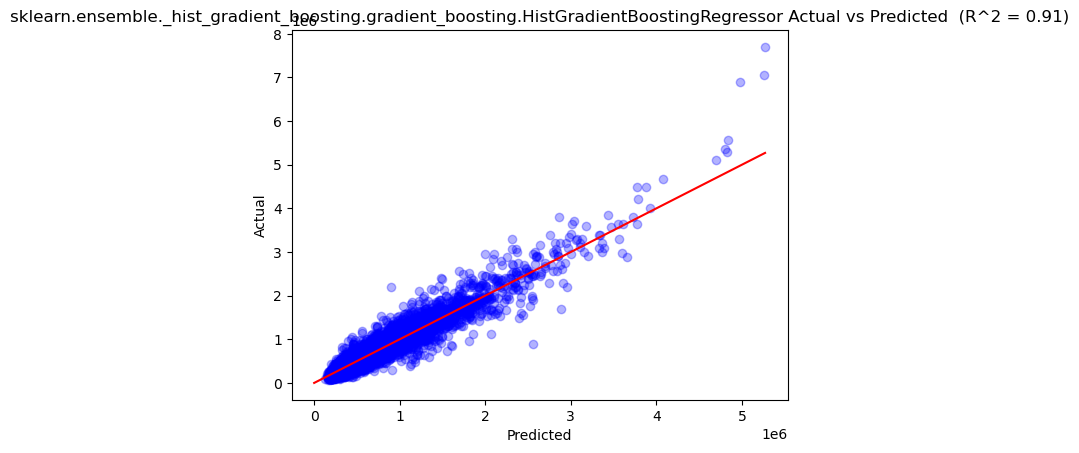

In [85]:
df_house_data_cleaned = df_house_data.query('bedrooms <= 8')
# print(df_house_data_cleaned.groupby('bedrooms')['bedrooms'].count())
# print(df_house_data_cleaned.groupby('waterfront')['waterfront'].count())
# print(df_house_data_cleaned.groupby('condition')['condition'].count())

# build basic linear regression model
target = df_house_data_cleaned['price']

# try with just a few columns, add and re-run the model
# features = df_house_data_cleaned[['bedrooms', 'bathrooms', 'sqft_living', 'yr_built']]
# try to impove the model by including many columns:
# trying to exclude categorical variables
features = df_house_data_cleaned.drop(['date', 'yr_built', 'yr_renovated',
                                       # 'zipcode',
                                        'lat', 'long', 'price'], axis=1)
print(f"features = {features.columns}")

# linear regression model
# model = sklearn.linear_model.LinearRegression()
# model.fit(features, target)

# this is a regression models based on a decision tree
model = sklearn.ensemble.HistGradientBoostingRegressor()
model.fit(features, target)

# initialize a decision tree model
# model = sklearn.tree.DecisionTreeRegressor()
# model.fit(features, target)

# show_model_details(model, features, target)
plot_model(model, features, target)

**Classification**

Some categorical variables to explore: bedrooms, bathrooms, waterfront, view, zipcode.

bedrooms:


Text(0, 0.5, 'actual')

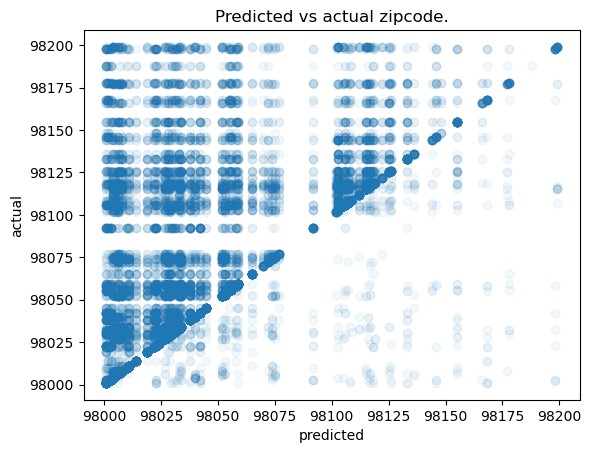

In [ ]:
df_house_data_cleaned = df_house_data.query('bedrooms <= 8')

# print('bedrooms:')
# print(df_house_data_cleaned['bedrooms'].value_counts())

# target_column = 'bedrooms'
target_column = 'zipcode'
target = df_house_data_cleaned[target_column]
features = df_house_data_cleaned[['price', 'yr_built', 'yr_renovated',
                                  'bedrooms', 'waterfront', 'view']]
# use a classification model:
nn_model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=3)
nn_model.fit(features, target)

df_check = df_house_data_cleaned.copy()
# use the features to "guess" the number of bedrooms
df_check['predicted'] = nn_model.predict(features)
# print(df_check[['price','predicted', 'bedrooms']].sample(10))

# produce a column of boolean values
df_check['correct'] = df_check['predicted'] == df_check['bedrooms']
df_check['correct'].value_counts()

plt.scatter(df_check['predicted'], target, alpha=0.05)
plt.title(f"Predicted vs actual {target_column}.")
plt.xlabel('predicted')
plt.ylabel('actual')


Classification with coloring by category

Text(0.5, 1.0, 'relationship between sqft and price, color by bedrooms')

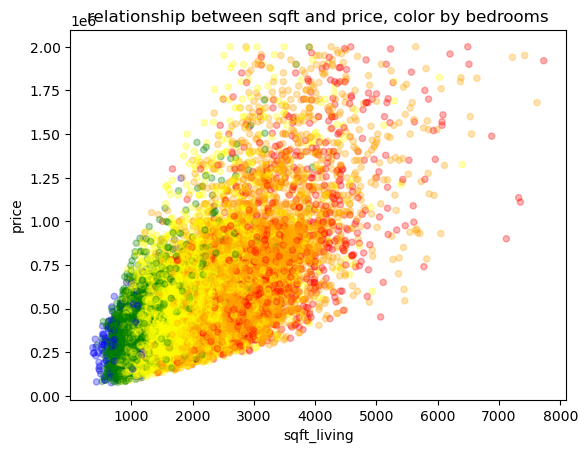

In [108]:
df_house_data_cleaned = df_house_data.query('0 < bedrooms <= 5').query('price <= 2000000')

# print(df_house_data_cleaned.groupby('bedrooms')['bedrooms'].count())

# assign a color based on number of bedrooms:
color_scheme = {1: "blue", 2: "green", 3: "yellow", 4: "orange", 5: "red"}
df_house_data_cleaned['color'] = df_house_data_cleaned['bedrooms'].map(color_scheme)
# print(df_house_data_cleaned[['bedrooms','color']].sample(20))

_ = df_house_data_cleaned.plot.scatter('sqft_living', 'price', c='color', alpha=0.3)
plt.title("relationship between sqft and price, color by bedrooms")
